In [46]:
import pandas as pd 

data_main=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.14/gait/gait_target_norm.xlsx")

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.14/gait/gait_target_norm_drop.xlsx")

In [47]:
data

,Unnamed: 0,FORCE_B(Right),"FORCE_C(Left),",Force_C(Left).1
0,0,0.000000,0.000000,0.461877
1,1,0.000000,0.000000,0.461877
2,2,0.000000,0.000000,0.461877
3,3,NaN,NaN,NaN
4,4,0.000000,0.000000,0.461877
...,...,...,...,...
596,596,0.064085,0.032817,0.266862
597,597,NaN,NaN,NaN
598,598,0.010681,0.000000,0.260330
599,599,0.004005,0.000000,0.260330


In [48]:
data_main.drop(columns=['Unnamed: 0'],inplace=True)
data.drop(columns=['Unnamed: 0'],inplace=True)

<Axes: >

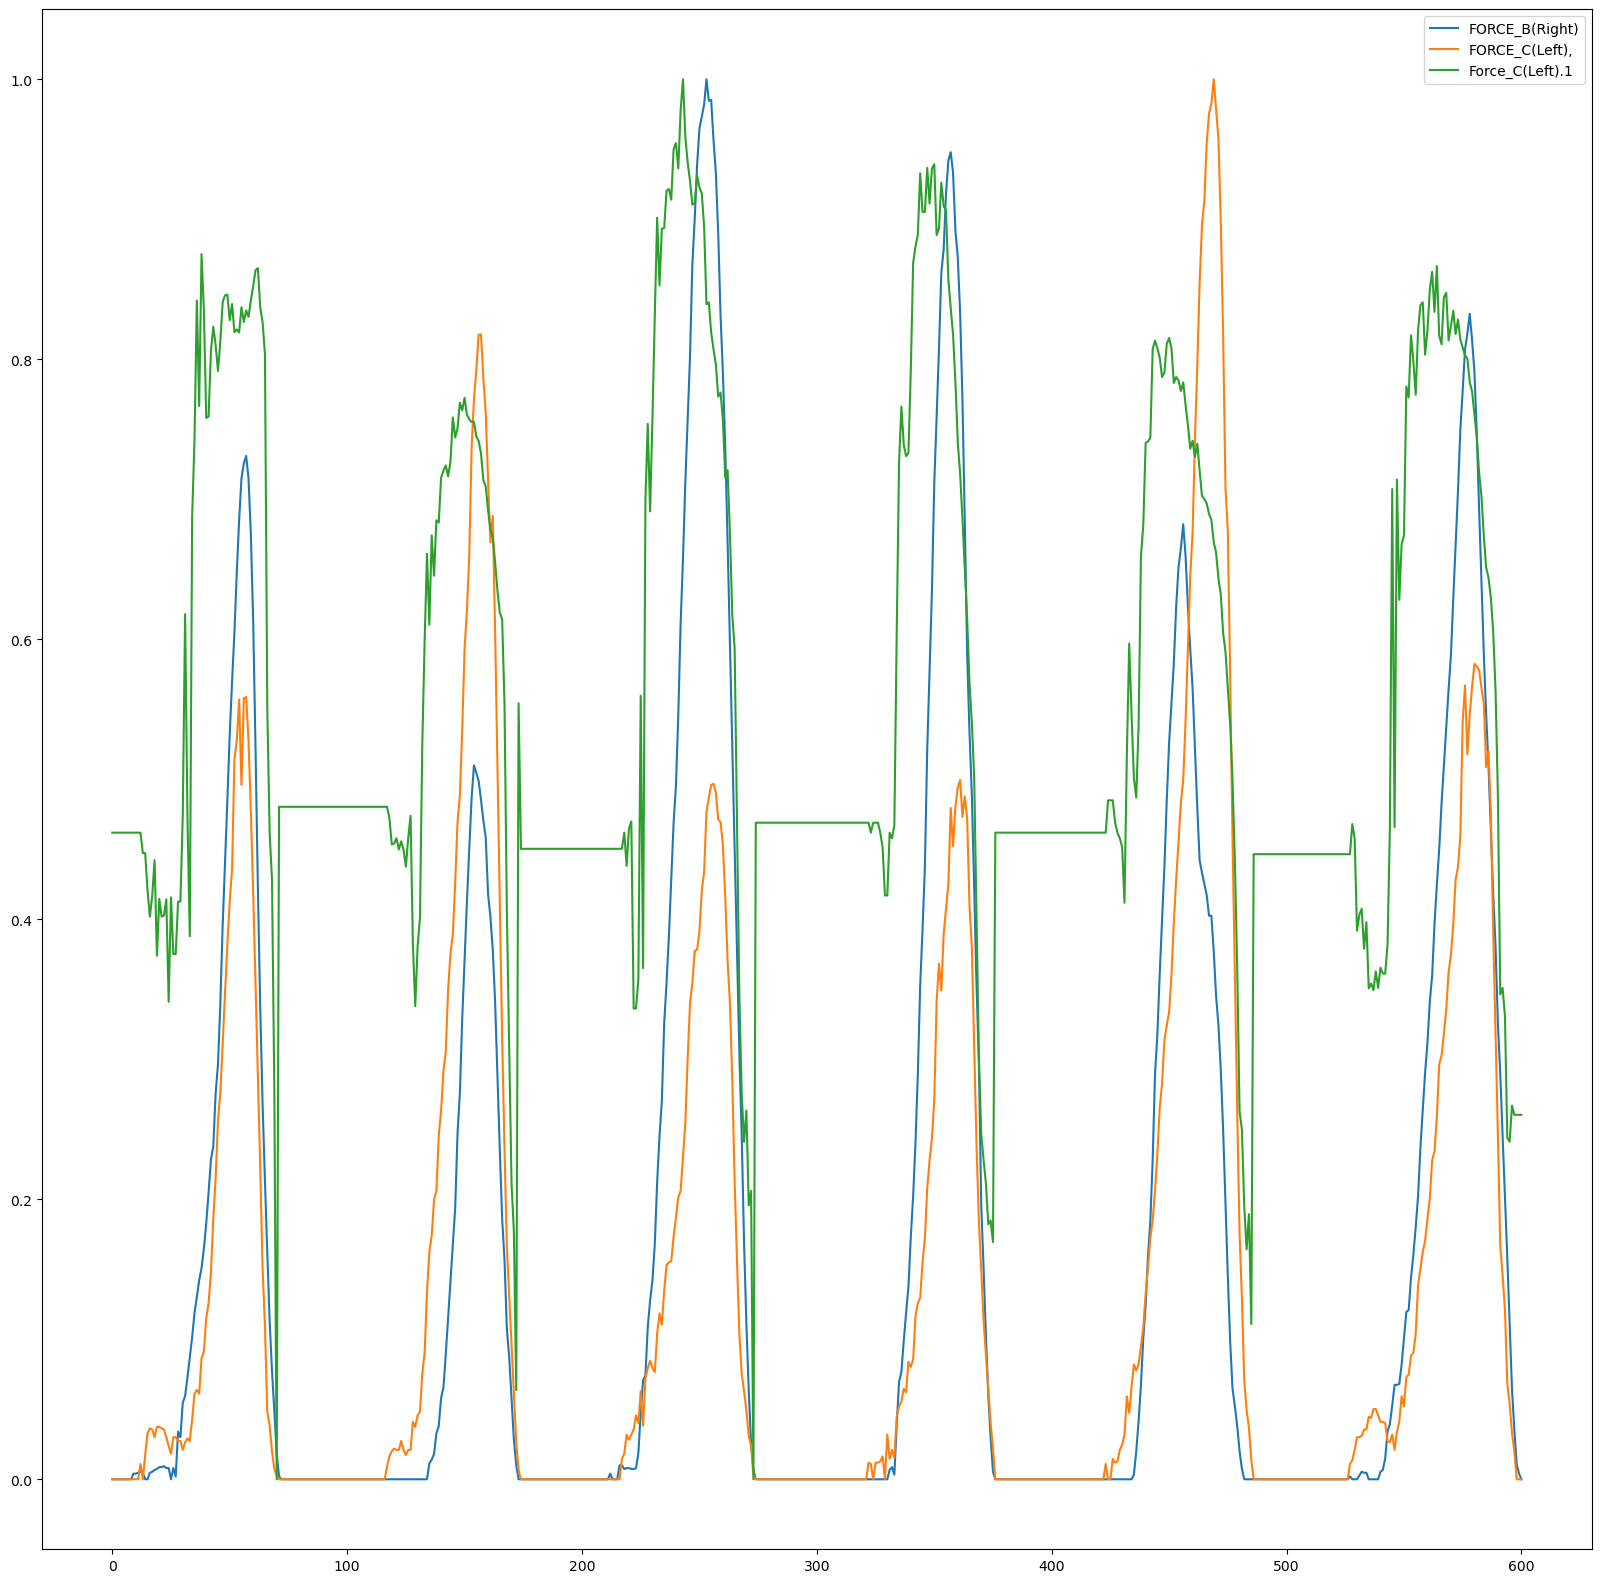

In [49]:
data_main.plot(figsize=(20,20))

<Axes: >

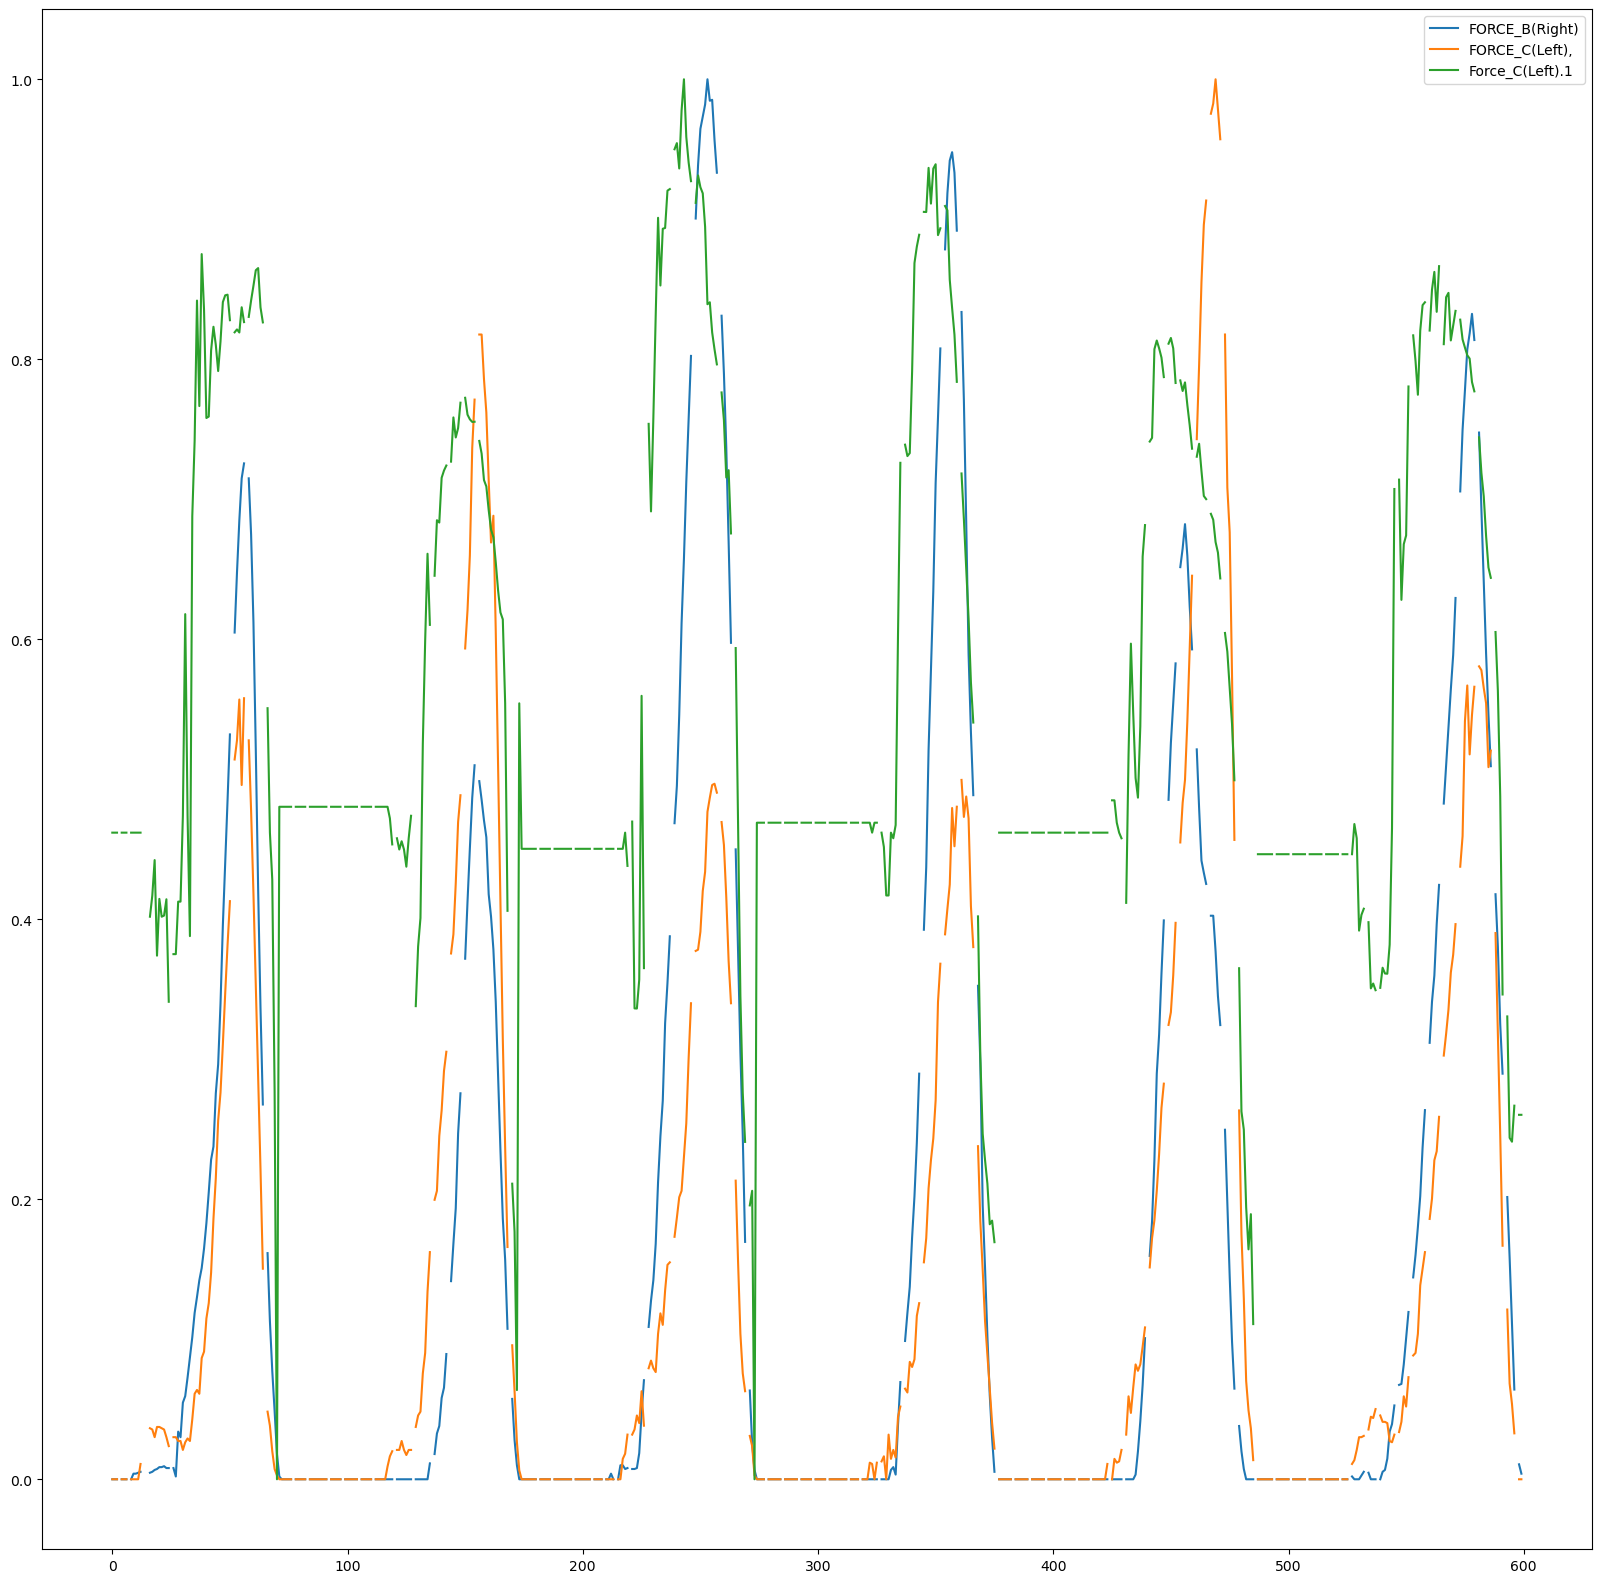

In [50]:
data.plot(figsize=(20,20))

In [51]:
print(data.isnull().sum())
print(data_main.isnull().sum())

FORCE_B(Right)     82
FORCE_C(Left),     82
Force_C(Left).1    82
dtype: int64
FORCE_B(Right)     0
FORCE_C(Left),     0
Force_C(Left).1    0
dtype: int64


FORCE_B(Right)


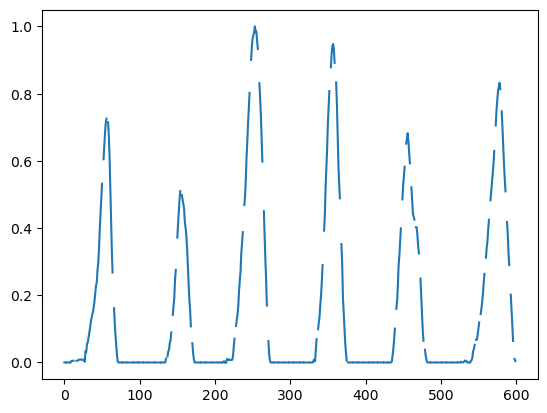

FORCE_C(Left),


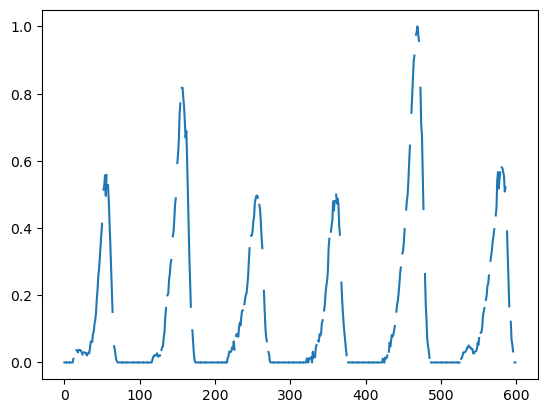

Force_C(Left).1


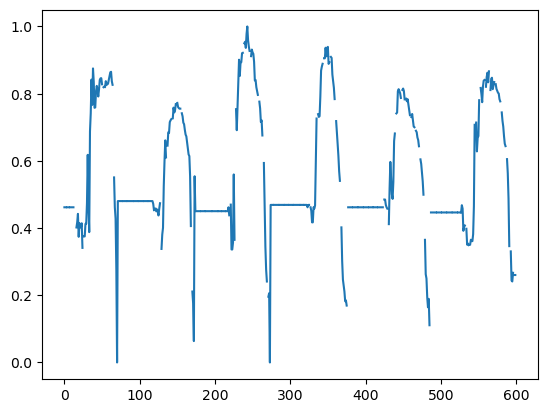

In [52]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    

In [53]:
## R_FORCE_B : L_FORCE_C
## R_FORCE_B : L_FSR_C : 

In [54]:
data_sca=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.03/data_norm.xlsx")
data_sca.drop(columns=["Unnamed: 0","FORCE_B(Right)","FSR DATA_B(Right)"],inplace=True)




In [55]:
data_sca.columns

Index(['FORCE_C(Left),', 'FSR DATA_C(Left)'], dtype='object')

In [56]:
from sklearn.preprocessing import MinMaxScaler

data2=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.03/data_target.xlsx")

R2=data2.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]

scaler=MinMaxScaler()
R_scaled=scaler.fit_transform(R2)

R3=pd.DataFrame(data=R_scaled)

R_new=R3.set_axis(["FORCE_B(Right)","FSR DATA_B(Right)"],axis="columns")

R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]
L=data.loc[:,['FORCE_C(Left),','FSR DATA_C(Left)']]


KeyError: "['FSR DATA_B(Right)'] not in index"

In [ ]:
data.columns

Index(['FORCE_B(Right)', 'FORCE_C(Left),', 'FSR DATA_B(Right)',
       'FSR DATA_C(Left)'],
      dtype='object')

In [ ]:
R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]
L=data.loc[:,['FORCE_C(Left),','FSR DATA_C(Left)']]

<Axes: >

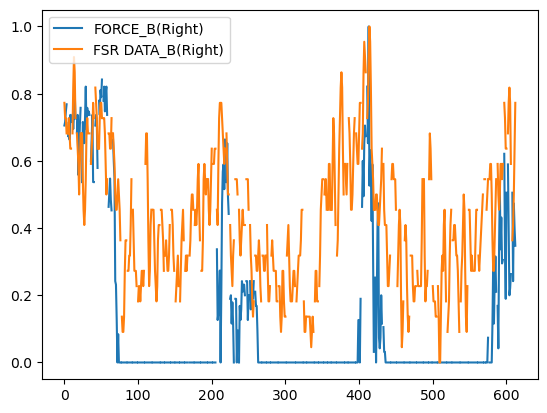

In [57]:
R.plot()

<Axes: >

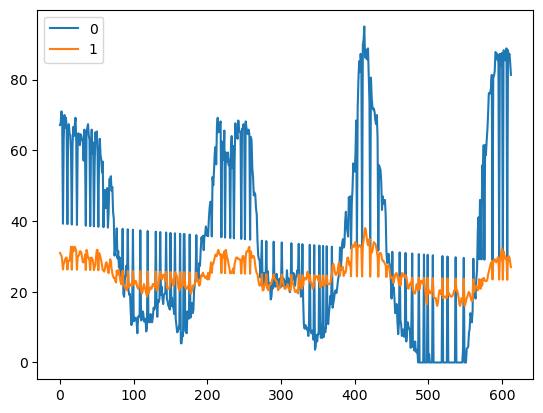

In [58]:
L.plot()

In [59]:
import numpy as np

index=R.index

loss_index_R_FORCE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]
loss_index_R_FSR_B=np.array(R.index).reshape(-1,1)[R.iloc[:,1].isna()]

normal_index_R_FORCE_B=np.setdiff1d(index,loss_index_R_FORCE_B)
normal_index_R_FSR_B=np.setdiff1d(index,loss_index_R_FSR_B)

In [60]:
index=L.index

loss_index_L_FORCE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORCE_C=np.setdiff1d(index,loss_index_L_FORCE_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [61]:
## R_FORCE_B : L_FORCE_C
##  R_FORCE_B : L_FSR_C 

In [62]:
x_train_R_FORCE_B=normal_index_R_FORCE_B.reshape(-1,1)
y_train_L_FORCE_C=L.iloc[normal_index_L_FORCE_C,0]
x_test_L_FORCE_C=loss_index_L_FORCE_C

y_train_L_FSR_C=L.iloc[normal_index_L_FORCE_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_FORCE_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [63]:
print(x_train_R_FORCE_B.shape)
print(y_train_L_FORCE_C.shape)

(535, 1)
(613,)


In [64]:

from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()
model.fit(x_train_R_FORCE_B,y_train_L_FORCE_C)
y_pred = model.predict(x_test_L_FORCE_C)
    
c=0
for i in loss_index_L_FORCE_C:    
    L_FORCE_C[i]=y_pred[c]
    c+=1


    


ValueError: Found input variables with inconsistent numbers of samples: [535, 613]

In [ ]:
#Best is trial 558 with value: 0.00943636272518866.
#{'n_estimators': 338, 'learning_rate': 0.10128617494256387, 'max_depth': 2}

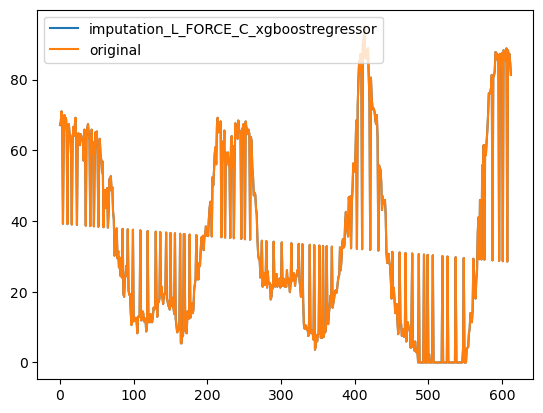

In [66]:
import matplotlib.pyplot as plt 
plt.plot(L_FORCE_C,label='imputation_L_FORCE_C_xgboostregressor')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [67]:
model = LinearRegression()
model.fit(x_train_R_FORCE_B,y_train_L_FSR_C)
y_pred = model.predict(x_test_L_FSR_C)

ValueError: Found input variables with inconsistent numbers of samples: [535, 613]

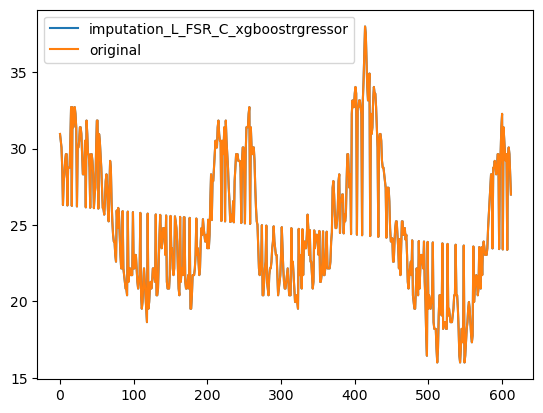

In [68]:
c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=y_pred[c]
    c+=1
    
    
plt.plot(L_FSR_C,label='imputation_L_FSR_C_xgboostrgressor')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [69]:
import numpy as np

def RMSE(data,pred):
    n=len(data)
    return np.sqrt((np.sum((data-pred)**2))/n)

print(RMSE(data_main['FORCE_C(Left),'],L_FORCE_C))
print(RMSE(data_main['FSR DATA_C(Left)'],L_FSR_C))

40.875252314628526


KeyError: 'FSR DATA_C(Left)'

In [ ]:
L.isnull().sum()


FORCE_C(Left),      78
FSR DATA_C(Left)    78
dtype: int64

In [ ]:
for i in loss_index_L_FORCE_C:    
    L['FORCE_C(Left),'][i]=L_FORCE_C[i]
    
for i in loss_index_L_FSR_C:    
    L['FSR DATA_C(Left)'][i]=L_FSR_C[i]

<Axes: >

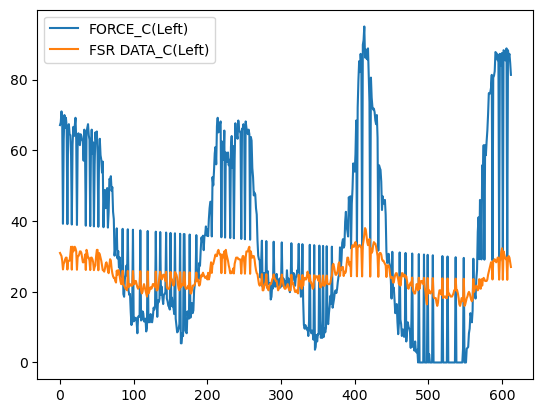

In [70]:
L=L.set_axis(["FORCE_C(Left)","FSR DATA_C(Left)"],axis="columns")
L.plot()

<Axes: >

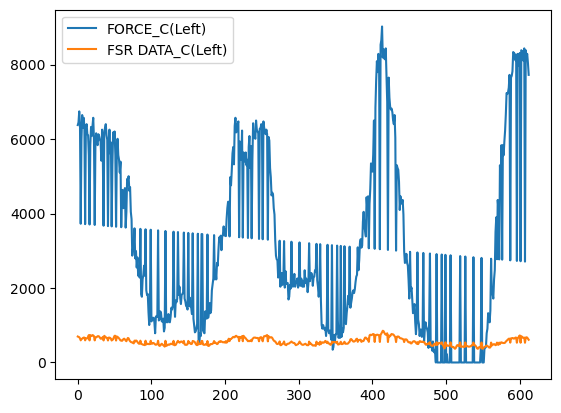

In [71]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["FORCE_C(Left)","FSR DATA_C(Left)"],axis="columns")
L_sca.plot()